In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog


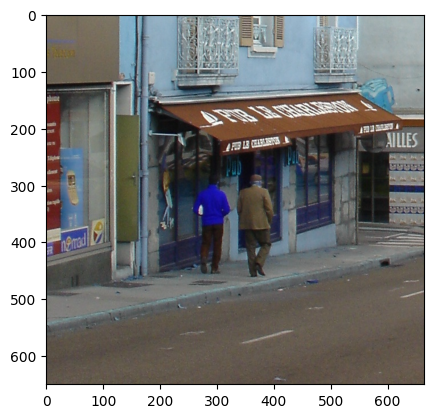

In [32]:
image = cv2.imread("crop001504.jpg")
plt.imshow(image)
plt.show()

 Extracting and Visualizing RGB Components

(-0.5, 663.5, 649.5, -0.5)

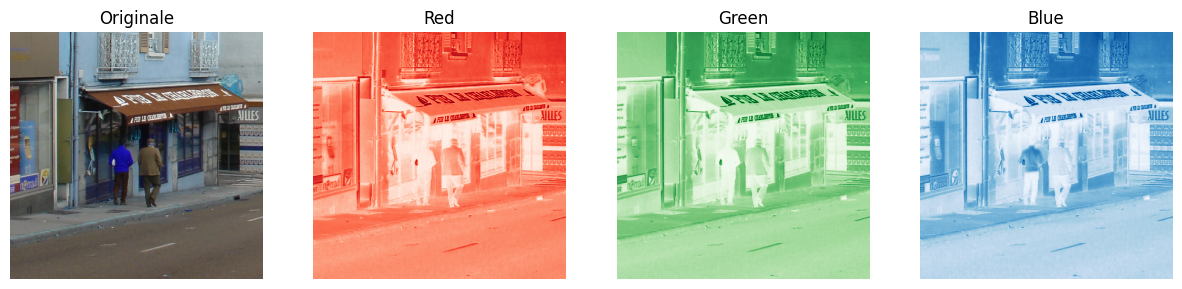

In [33]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
plt.figure(figsize=(15, 8))

plt.subplot(141)
plt.imshow(image)
plt.title('Originale')
plt.axis("off")

plt.subplot(142)

plt.imshow(red, cmap="Reds")
plt.title('Red')
plt.axis("off")

plt.subplot(143) 

plt.imshow(green, cmap="Greens")
plt.title('Green')
plt.axis("off")

plt.subplot(144)

plt.imshow(blue, cmap = "Blues")
plt.title('Blue')
plt.axis("off")



# Computing Horizontal and Vertical Gradients 

cv2.Sobel() calculates the gradient of an image.
(0,1) → Detects horizontal edges.
(1,0) → Detects vertical edges.

(-0.5, 663.5, 649.5, -0.5)

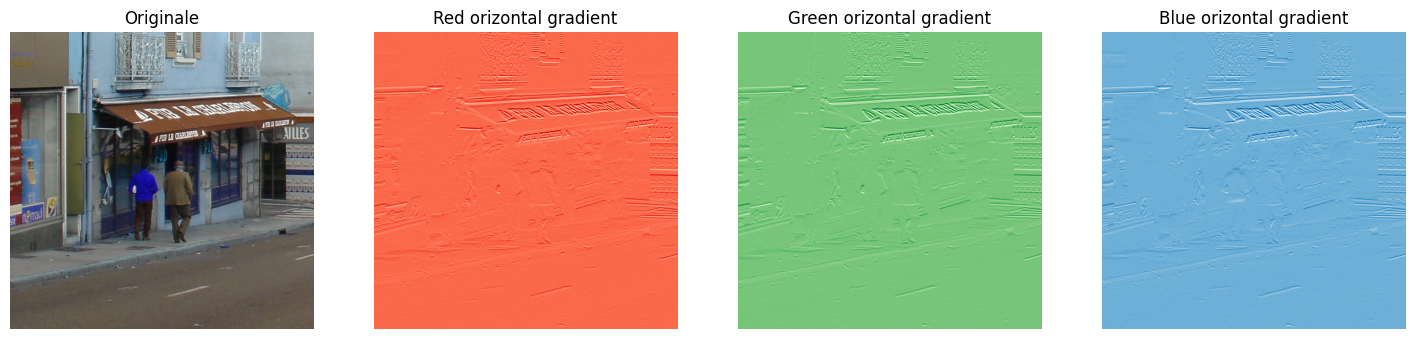

In [34]:
red_H = cv2.Sobel(image[:,:,0], cv2.CV_32F, 0, 1, ksize = 1)
green_H = cv2.Sobel(image[:,:,1], cv2.CV_32F, 0, 1, ksize = 1)
blue_H = cv2.Sobel(image[:,:,2], cv2.CV_32F, 0, 1, ksize = 1)

plt.figure(figsize=(18, 7))

plt.subplot(141)
plt.imshow(image)
plt.title('Originale')
plt.axis("off")

plt.subplot(142)

plt.imshow(red_H, cmap="Reds")
plt.title('Red orizontal gradient')
plt.axis("off")

plt.subplot(143) 

plt.imshow(green_H, cmap="Greens")
plt.title('Green orizontal gradient')
plt.axis("off")

plt.subplot(144)

plt.imshow(blue_H, cmap = "Blues")
plt.title('Blue orizontal gradient')
plt.axis("off")


(-0.5, 663.5, 649.5, -0.5)

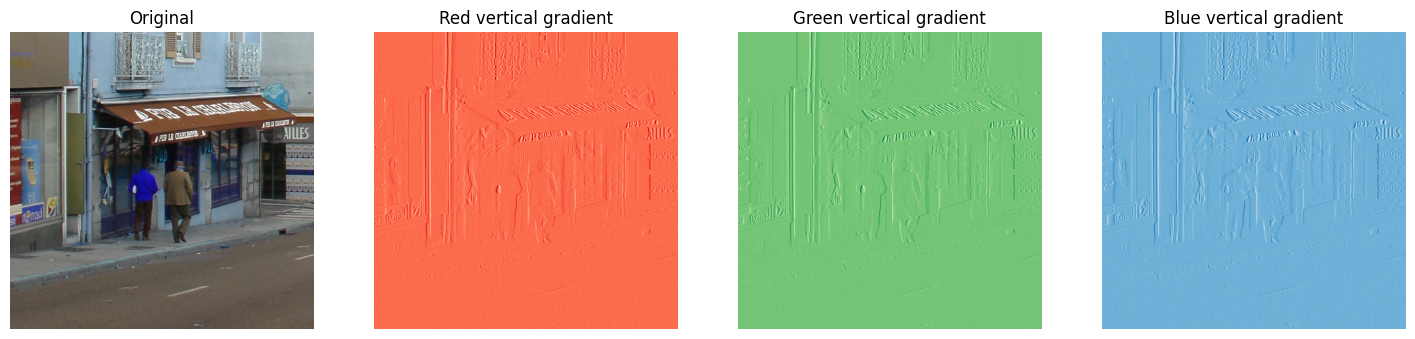

In [36]:
red_v = cv2.Sobel(image[:,:,0], cv2.CV_32F,  1,0, ksize = 1)
green_v = cv2.Sobel(image[:,:,1], cv2.CV_32F,  1,0, ksize = 1)
blue_v = cv2.Sobel(image[:,:,2], cv2.CV_32F, 1,0, ksize = 1)
plt.figure(figsize=(18, 7))

plt.subplot(141)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(142)

plt.imshow(red_v, cmap="Reds")
plt.title('Red vertical gradient')
plt.axis("off")

plt.subplot(143) 

plt.imshow(green_v, cmap="Greens")
plt.title('Green vertical gradient')
plt.axis("off")

plt.subplot(144)

plt.imshow(blue_v, cmap = "Blues")
plt.title('Blue vertical gradient')
plt.axis("off")


# Computing Gradient Magnitude (Edge Strength)

The gradient magnitude tells us how strong an edge is at each pixel. A higher magnitude means a stronger edge.

(-0.5, 663.5, 649.5, -0.5)

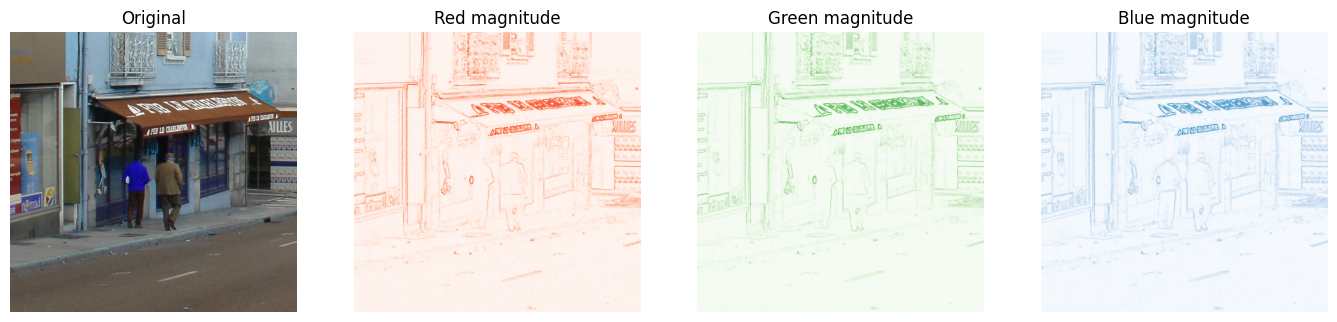

In [37]:
red_mag = np.sqrt(red_v**2 + red_H**2)
green_mag = np.sqrt(green_v**2 + green_H**2)
blue_mag = np.sqrt(blue_v**2 + blue_H**2)
plt.figure(figsize=(17, 9))

plt.subplot(141)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(142)

plt.imshow(red_mag, cmap="Reds")
plt.title('Red magnitude')
plt.axis("off")

plt.subplot(143) 

plt.imshow(green_mag, cmap="Greens")
plt.title('Green magnitude')
plt.axis("off")

plt.subplot(144)

plt.imshow(blue_mag, cmap = "Blues")
plt.title('Blue magnitude')
plt.axis("off")

In [38]:
def maxnormgrad(magnitudes,angles):
    """"Finds the channel with the highest gradient magnitude for each pixe
    Returns:
        A: Angle (direction of the strongest edge)
        M: Maximum gradient magnitude.
    """
    max_norm = np.argmax(magnitudes, axis=2)
    m, n = np.shape(max_norm)
    I, J = np.ogrid[:m, :n]
    A = angles[I, J, max_norm]
    M = magnitudes[I, J, max_norm]
    return A, M

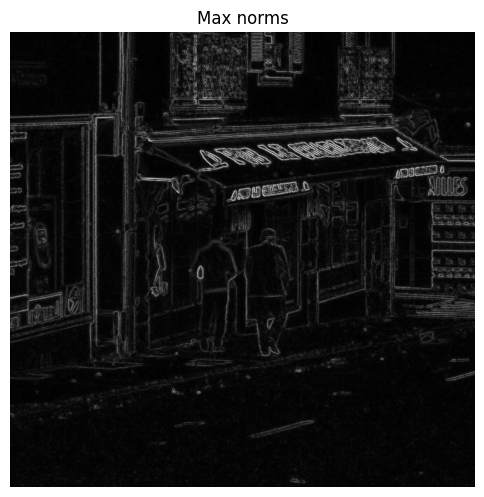

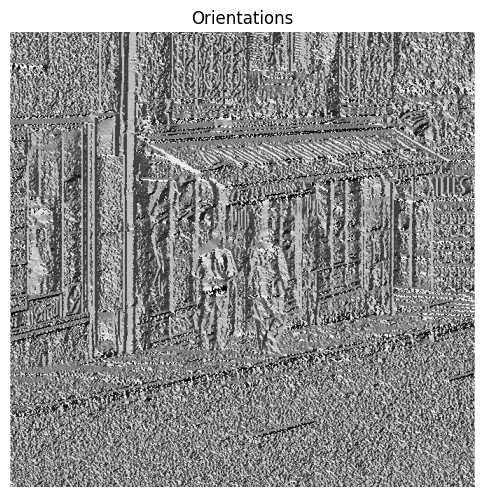

In [39]:

magnitudes = np.stack((red_mag , green_mag, blue_mag), axis=-1)
angles_r = np.arctan2(red_v, red_H)
angles_g = np.arctan2(green_v, green_H)
angles_b = np.arctan2(blue_v, blue_H)

angles = np.stack((angles_r, angles_g, angles_b), axis=-1)

A, M = maxnormgrad(magnitudes, angles)

plt.figure(figsize=(6, 6))
plt.imshow(M, cmap='gray')
plt.title("Max norms")
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap='gray')
plt.title("Orientations")
plt.axis('off')

plt.show()


#  HOG 

In [15]:
gray_I1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(gray_I1, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2", visualize=True)


In [40]:
def visuHOG(I, hog_image_scaling_factor):
    scaling_factor = 10
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(I, cmap=plt.cm.gray)
    ax1.set_title('Original Image')

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, hog_image_scaling_factor))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('HOG')
    plt.show()

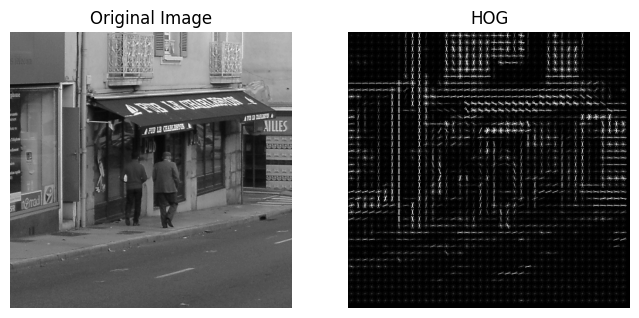

In [41]:
from skimage import exposure

visuHOG(gray_I1,10)

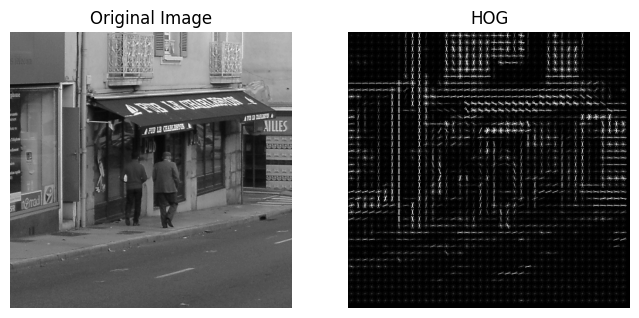

In [42]:
fd_4, hog_image = hog(gray_I1, pixels_per_cell=(16, 16), cells_per_block=(16, 16), block_norm='L1', visualize=True)
visuHOG(gray_I1,10)